<a href="https://colab.research.google.com/github/Jayshree2816/Spam-Message-Classsification/blob/master/Spam_Message_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('spam.tsv', sep='\t')

In [33]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [34]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [35]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [36]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [37]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [38]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [39]:
ham = ham.sample(spam.shape[0])

In [40]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [41]:
data = ham.append(spam , ignore_index = True)

In [42]:
data.shape

(1494, 4)

In [43]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

<function matplotlib.pyplot.show>

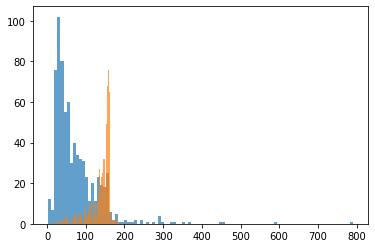

In [44]:
plt.hist(data[data['label']== 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']== 'spam']['length'], bins = 100, alpha = 0.7)
plt.show

<function matplotlib.pyplot.show>

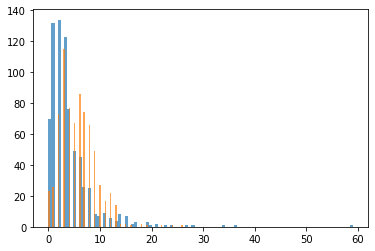

In [45]:
plt.hist(data[data['label']== 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']== 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show

Divide data into train and test data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train ,X_test, y_train,y_test = train_test_split(data['message'],data['label'],test_size = 0.3, random_state = 0,shuffle = True)

In [48]:
X_train.shape, X_test.shape

((1045,), (449,))

# **Building the model (Random forest)**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [50]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators = 10))])

In [51]:
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

# **Predicting the result(Random Forest)**

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
y_pred

array(['spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham',

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [57]:
accuracy_score(y_test, y_pred)

0.9086859688195991

In [58]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 38, 184]])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.85      0.99      0.92       227
        spam       0.98      0.83      0.90       222

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



# Building model with SVM

In [62]:
from sklearn.svm import SVC

In [65]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C = 100, gamma = 'auto'))])

In [66]:
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

# Predicting the results(SVM)

In [67]:
y_pred = svm.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.9465478841870824

In [69]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 21, 201]])

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



# **Test model on some examples**